In [0]:
from matplotlib import pyplot as plt
import matplotlib
import pandas
import numpy as np
from scipy.fftpack import fft

In [0]:
ekgDF = pandas.read_csv('ekg.csv')

In [0]:
print ('Sampling frequency is: ')
samplingFreq = 1/(ekgDF['Time (s)'][22]-ekgDF['Time (s)'][21])
print (samplingFreq)
ekgDF


Sampling frequency is: 
3999.9999999986644


,Time (s),Channel 1 (V)
0,-1.12925,-0.015717
1,-1.12900,-0.013341
2,-1.12875,-0.015038
3,-1.12850,-0.012662
4,-1.12825,-0.015378
...,...,...
7995,0.86950,-0.019451
7996,0.86975,-0.021828
7997,0.87000,-0.018093
7998,0.87025,-0.018093


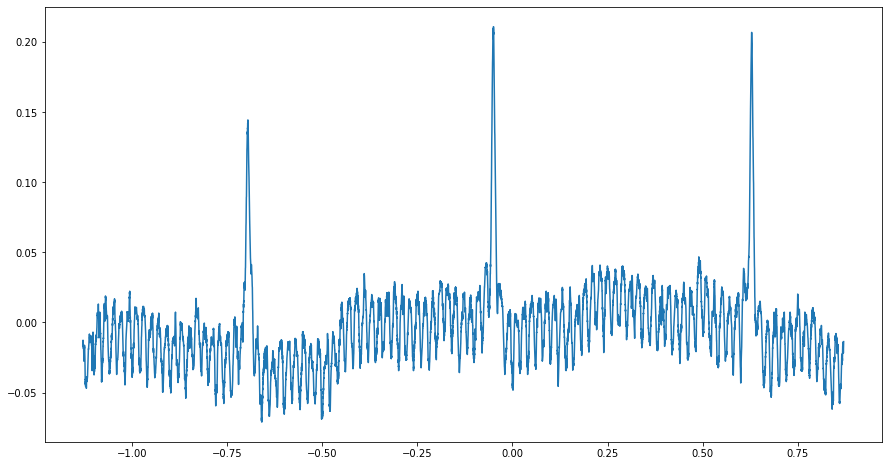

In [0]:
# Time Domain Signal
matplotlib.rc('figure', figsize=(15, 8))
plt.plot(ekgDF['Time (s)'],ekgDF['Channel 1 (V)'])


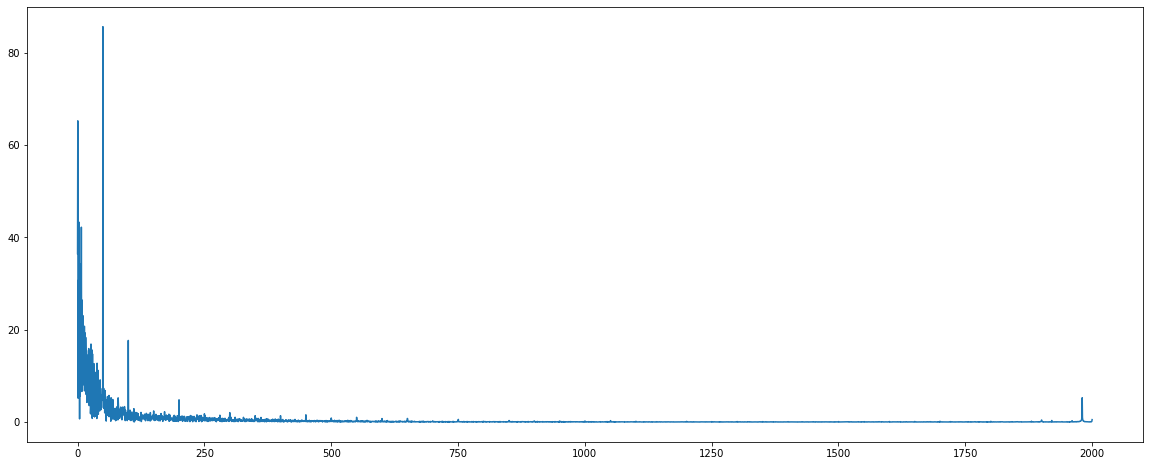

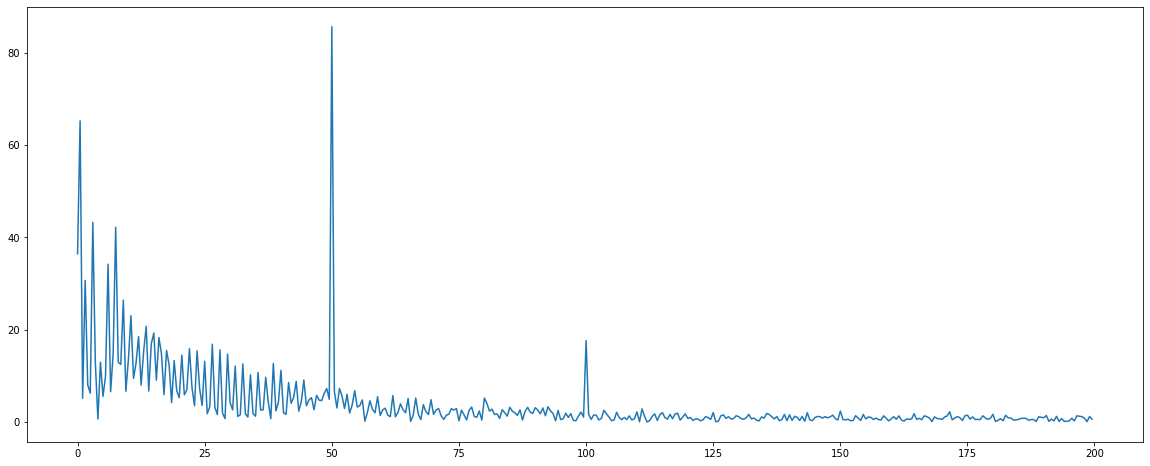

In [0]:
# Frequency Domain
# FFT len is half size of the signal len
# Because of nyquist theorem only half of the sampling frequency can be seen in the sprectrum
ekgData = ekgDF['Channel 1 (V)'].values
fftData = np.abs( fft(ekgData) )
fftLen = int(len(fftData) / 2)
freqs = np.linspace(0,samplingFreq/2, fftLen )

matplotlib.rc('figure', figsize=(20, 8))

plt.figure()
plt.plot( freqs, fftData[0:fftLen] )
plt.figure()

plt.plot( freqs[0:400], fftData[0:400] )

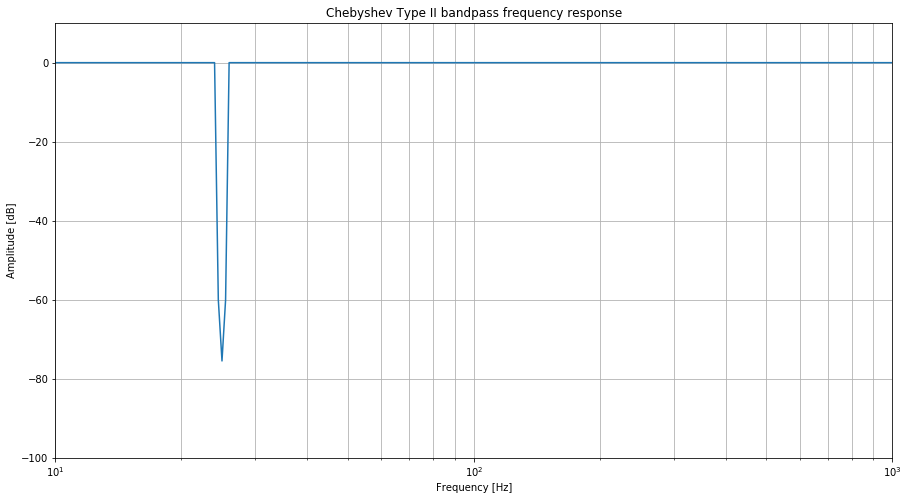

In [0]:

## Design IIR filter
from scipy import signal
sos = signal.iirfilter(17, [49, 51], rs=60, btype='bandstop',
                        analog=False, ftype='cheby2', fs=4000,
                        output='sos')
w, h = signal.sosfreqz(sos, 2000, fs=2000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w, 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()


In [0]:
## filter out 50 Hz noise
ekgFiltered = signal.sosfilt(sos, ekgData)

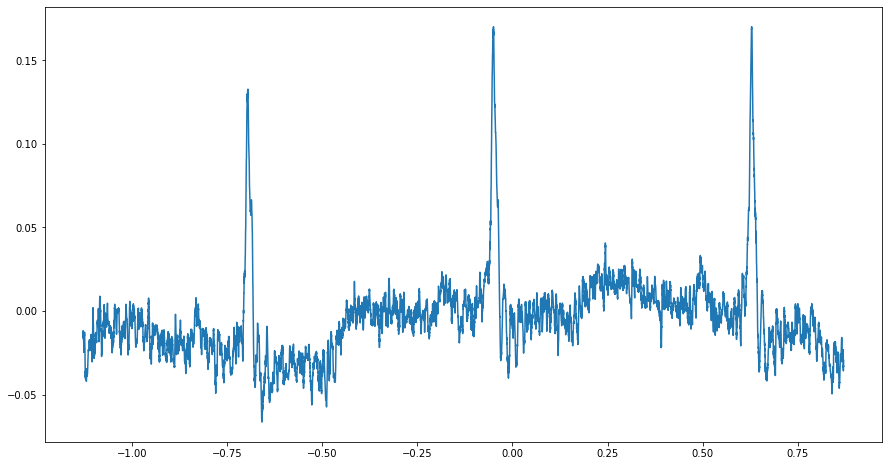

In [0]:
# Time Domain Signal
matplotlib.rc('figure', figsize=(15, 8))
plt.plot(ekgDF['Time (s)'],ekgFiltered)

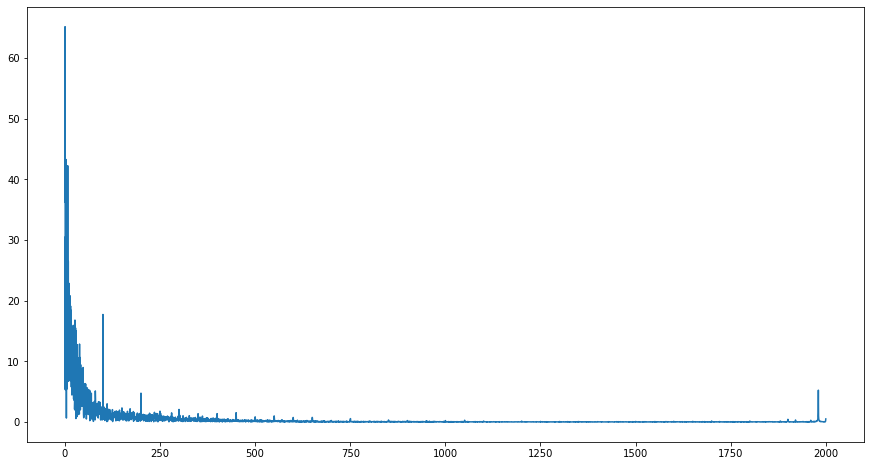

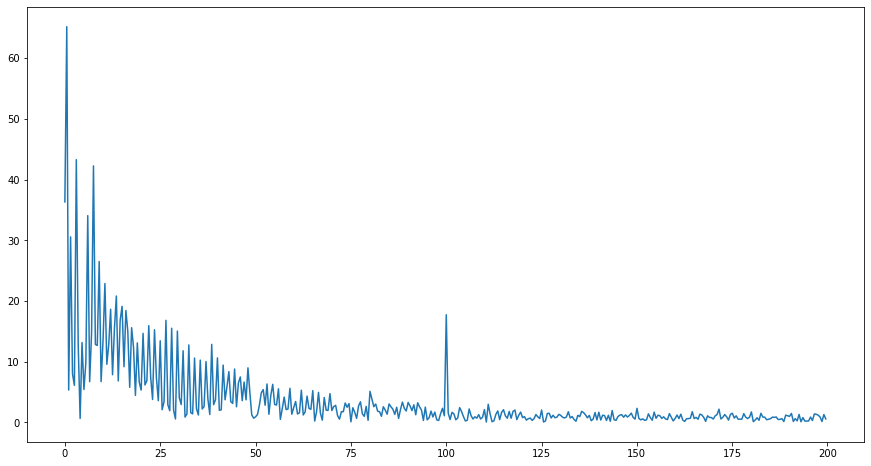

In [0]:
# Frequency Domain
# FFT len is half size of the signal len
# Because of nyquist theorem only half of the sampling frequency can be seen in the sprectrum
fftData = np.abs( fft(ekgFiltered) )
fftLen = int(len(fftData) / 2)
freqs = np.linspace(0,samplingFreq/2, fftLen )

matplotlib.rc('figure', figsize=(15, 8))

plt.figure()
plt.plot( freqs, fftData[0:fftLen] )
plt.figure()

plt.plot( freqs[0:400], fftData[0:400] )

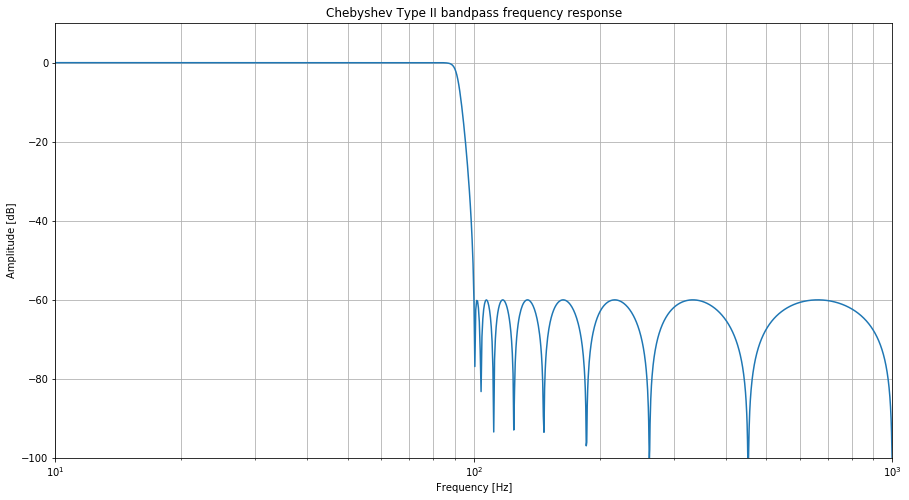

In [0]:
## Design IIR filter
sos2 = signal.iirfilter(17, [0.5, 200], rs=60, btype='bandpass',
                        analog=False, ftype='cheby2', fs=4000,
                        output='sos')
w, h = signal.sosfreqz(sos2, 2000, fs=2000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w, 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()

In [0]:
## filter out 50 Hz noise
ekgFiltered2 = signal.sosfilt(sos2, ekgFiltered)

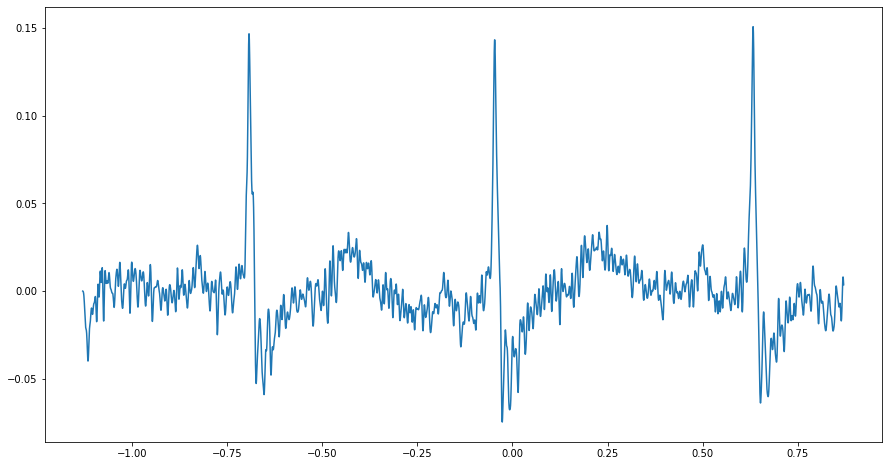

In [0]:
# Time Domain Signal
matplotlib.rc('figure', figsize=(15, 8))
plt.plot(ekgDF['Time (s)'],ekgFiltered2)

![](http://www.ni.com/cms/images/devzone/tut/2007-07-09_141618.jpg)

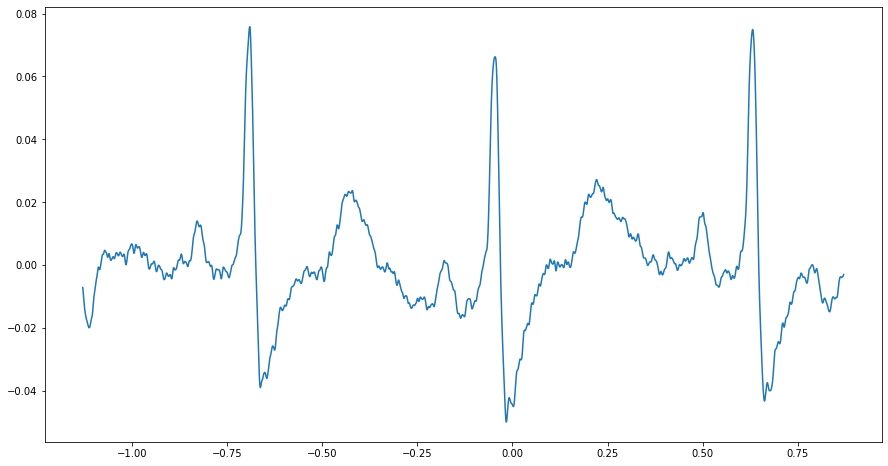

In [0]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

# Time Domain Signal
matplotlib.rc('figure', figsize=(15, 8))
plt.plot(ekgDF['Time (s)'],moving_average(ekgFiltered2, 100))
